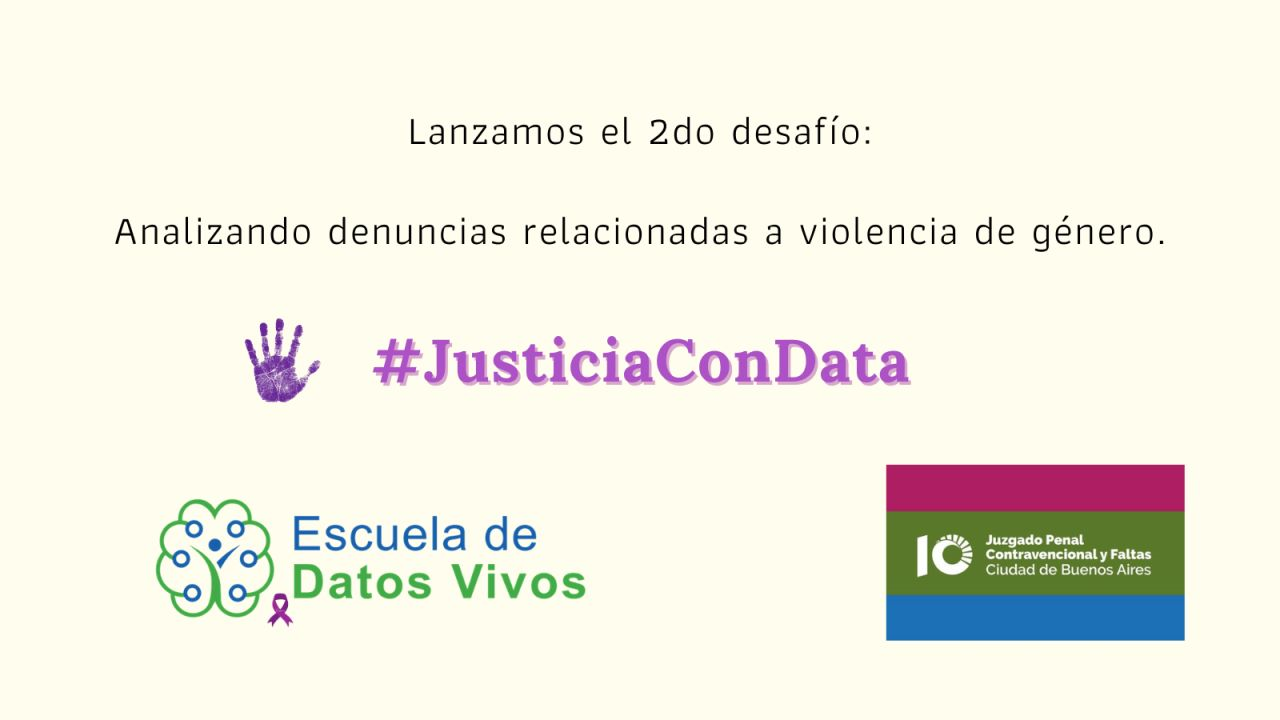

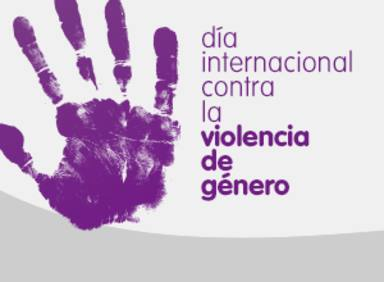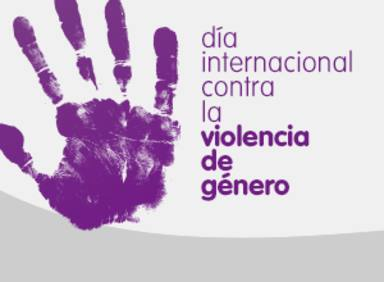

#### Este notebook es parte del desafio de <a href="https://escueladedatosvivos.ai/">Escuela de Datos Vivos</a> por el dia internacional de la eliminacion de la violencia contra la mujer

Realizado por <a href="https://www.linkedin.com/in/rodrigo-kelemen-b3b5b513b/">Rodrigo Kelemen</a>


    1-Importacion y estado de salud del dataset
    
    2-Analisis exploratorio de datos
    
    3-Preparacion de datos
        
    4-Implementacion de un modelo de clustering con la tecnica k-means
    
    5-Conclusiones
    

In [38]:
import pandas as pd
import numpy as np
from funpymodeling.exploratory import status ,freq_tbl,profiling_num, cat_vars, num_vars
import seaborn as sns
import matplotlib.pyplot as plt
from qgrid import show_grid
from funpymodeling.exploratory import corr_pair
from minepy import MINE
from pandas_profiling import ProfileReport
import missingno as ms
from funpymodeling.model_validation import coord_plot
from yellowbrick.cluster.elbow import kelbow_visualizer
from copy import deepcopy
from sklearn.cluster import KMeans
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler

# Parte 1- Importacion y estado de salud del dataset

Importamos el dataset y hacemos una copia de los datos originales

In [39]:
data =pd.read_csv("C:/Users/Usuario/Desktop/Cursos/Data science python - EDV/Proyectos/Violencia de genero/data/set_de_datos_con_perspectiva_de_genero - set_de_datos_con_perspectiva_de_genero.csv")
data_original = data.copy()

In [40]:
data.head()

,N,NRO_REGISTRO,FECHA_RESOLUCION,FIRMA,MATERIA,ART_INFRINGIDO,CODIGO_O_LEY,CONDUCTA,CONDUCTA_DESCRIPCION,VIOLENCIA_DE_GENERO,...,LINK_CAMARA.1,QUEJA_Y_RECURRENTE,DECISION_DE_ADMISIBILIDAD_TSJ,N_REGISTRO_Y_TOMO_TSJ,LINK_TSJ,DECISION_DE_FONDO_TSJ,N_REGISTRO_Y_TOMO_TSJ.1,LINK_TSJ.1,RECURSO_EXTRAORDINARIO_Y_RECURRENTE,DECISION_CSJN
0,1.0,NaN,1_8_2016,Pablo_Casas,penal,1,ley_14346,proteccion_animal,no_corresponde,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1_8_2016,Pablo_Casas,penal,149bis,codigo_penal_de_la_nacion,amenazas,simples,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,2_8_2016,Pablo_Casas,contravencional,52,codigo_contravencional,hostigamiento,no_corresponde,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,2_8_2016,Pablo_Casas,contravencional,73,codigo_contravencional,incumplir_clausura,no_corresponde,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,2_8_2016,Pablo_Casas,penal,149bis,codigo_penal_de_la_nacion,amenazas,simples,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Con la funcion status observamos un primer pantallazo de los datos, que tipos son, cuantos valores nulos y unicos hay

In [41]:
status(data).head(32)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,N,863,0.223459,0,0.0,2991,float64
1,NRO_REGISTRO,349,0.090368,0,0.0,2770,object
2,FECHA_RESOLUCION,197,0.051010,0,0.0,904,object
3,FIRMA,197,0.051010,0,0.0,3,object
4,MATERIA,198,0.051269,0,0.0,7,object
5,ART_INFRINGIDO,218,0.056447,0,0.0,161,object
6,CODIGO_O_LEY,218,0.056447,0,0.0,12,object
7,CONDUCTA,198,0.051269,0,0.0,139,object
8,CONDUCTA_DESCRIPCION,199,0.051528,0,0.0,36,object
9,VIOLENCIA_DE_GENERO,198,0.051269,0,0.0,3,object


In [42]:
status(data_original).tail(30)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
32,LUGAR_DEL_HECHO\n,488,0.126359,0,0.0,17,object
33,FECHA_DEL_HECHO,534,0.138270,0,0.0,1005,object
34,FECHA_DE_INICIO_DEL_HECHO,3516,0.910409,0,0.0,123,object
35,FECHA_DE_FINALIZACIÓN_DEL_HECHO,3516,0.910409,0,0.0,127,object
36,TIPO_DE_RESOLUCION,198,0.051269,0,0.0,2,object
37,OBJETO_DE_LA_RESOLUCION,198,0.051269,0,0.0,62,object
38,DETALLE,519,0.134386,0,0.0,265,object
39,DECISION,203,0.052563,0,0.0,2,object
40,ORAL_ESCRITA,199,0.051528,0,0.0,2,object
41,HORA_DE_INICIO,2305,0.596841,0,0.0,313,object


In [43]:
show_grid(data, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 200})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [44]:
print(f"El dataset contiene {data.shape[0]} filas y  {data.shape[1]} columnas")

El dataset contiene 3862 filas y  62 columnas


Usamos la libreria missingno para detectar patrones de los valores nulos

<AxesSubplot:>

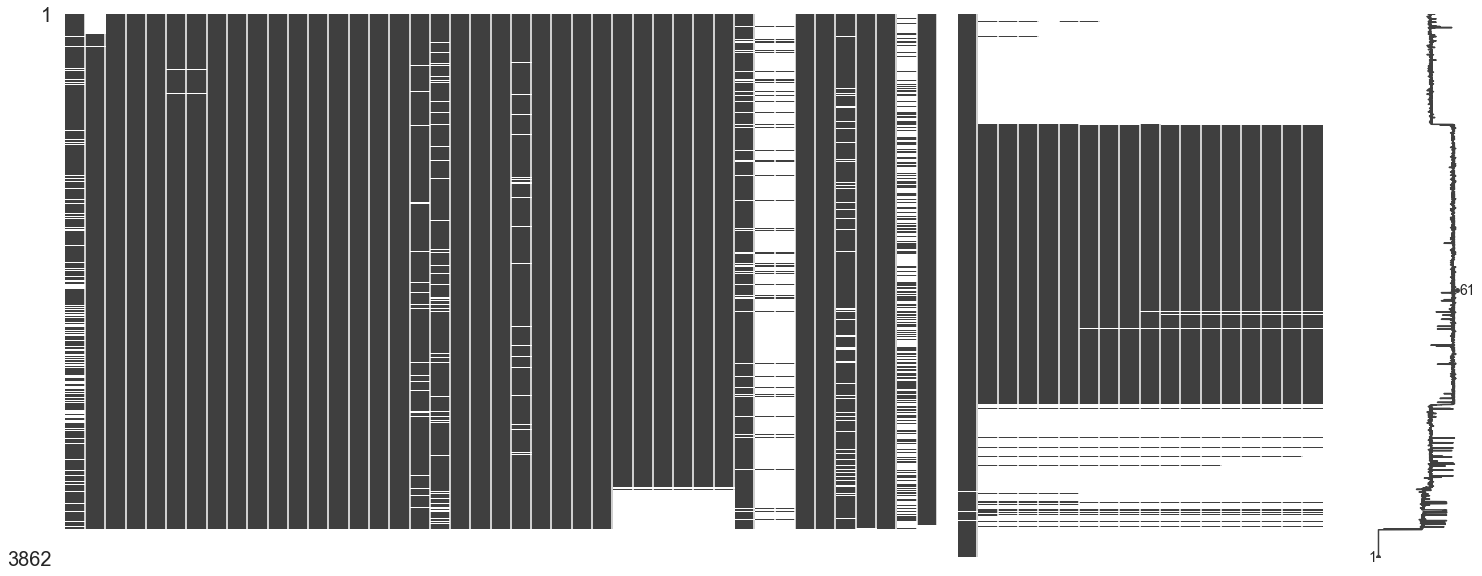

In [45]:
ms.matrix(data)

Observamos que hay registros que se encuentran vacios en todos los features (~198). Los eliminamos del dataset

In [46]:
#Eliminamos a mano esta instancia
data.drop(3660, inplace = True)
data.reset_index(drop=True)

,N,NRO_REGISTRO,FECHA_RESOLUCION,FIRMA,MATERIA,ART_INFRINGIDO,CODIGO_O_LEY,CONDUCTA,CONDUCTA_DESCRIPCION,VIOLENCIA_DE_GENERO,...,LINK_CAMARA.1,QUEJA_Y_RECURRENTE,DECISION_DE_ADMISIBILIDAD_TSJ,N_REGISTRO_Y_TOMO_TSJ,LINK_TSJ,DECISION_DE_FONDO_TSJ,N_REGISTRO_Y_TOMO_TSJ.1,LINK_TSJ.1,RECURSO_EXTRAORDINARIO_Y_RECURRENTE,DECISION_CSJN
0,1.0,NaN,1_8_2016,Pablo_Casas,penal,1,ley_14346,proteccion_animal,no_corresponde,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,1_8_2016,Pablo_Casas,penal,149bis,codigo_penal_de_la_nacion,amenazas,simples,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,2_8_2016,Pablo_Casas,contravencional,52,codigo_contravencional,hostigamiento,no_corresponde,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,2_8_2016,Pablo_Casas,contravencional,73,codigo_contravencional,incumplir_clausura,no_corresponde,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,2_8_2016,Pablo_Casas,penal,149bis,codigo_penal_de_la_nacion,amenazas,simples,si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Observamos que hay varias columnas que tienen la misma cantidad de nulos (198). Eliminamos toda la fila de aquellas muestras que no tengan 10 valores como minimo.
data.dropna(axis = 'index', how= 'all',thresh=10, inplace = True)
data.reset_index(inplace=True)

Replicamos el analisis anterior luego de eliminar los valores

<AxesSubplot:>

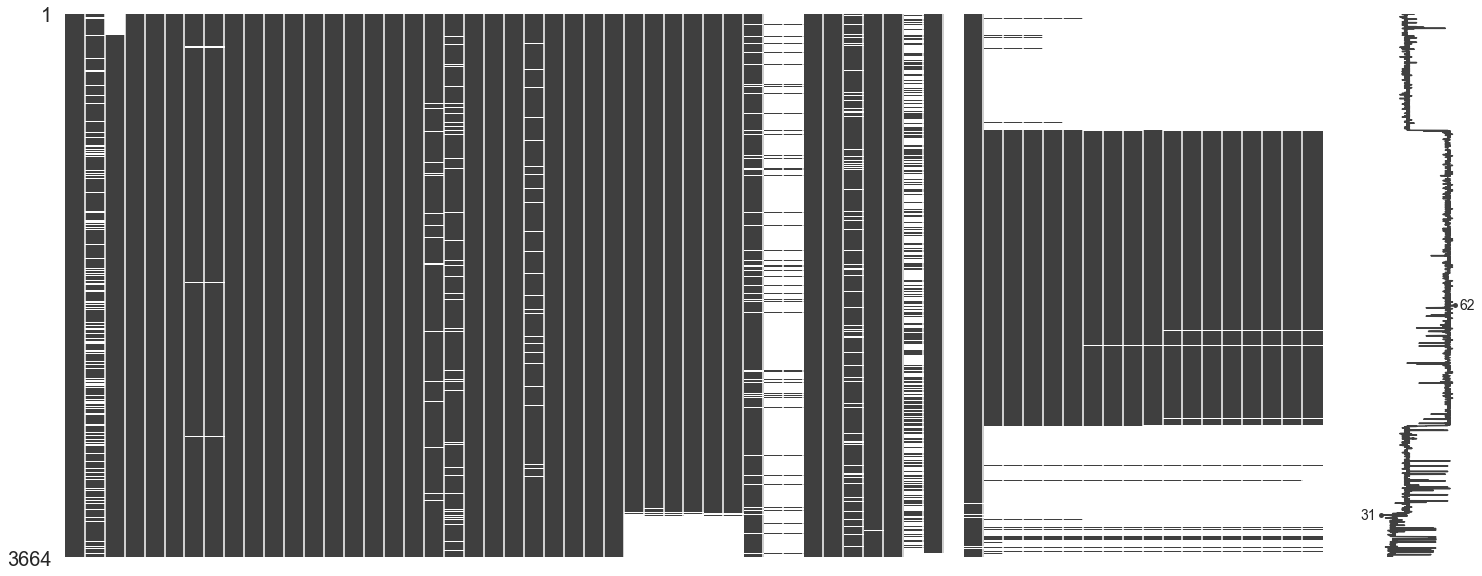

In [48]:
ms.matrix(data)

In [49]:
print(f"El dataset contiene {data.shape[0]} filas y  {data.shape[1]} columnas")

El dataset contiene 3664 filas y  63 columnas


In [50]:
ProfileReport(data, minimal=True)

Seleccionamos las variables mas importantes y las guardamos en otro dataframe, con el que vamos a continuar trabajando

In [51]:
data_hecho = data.drop(['HORA_DE_INICIO', 'LINK', 'MODELO_DESTACADO', 'DURACION',
       'SI_NO_RECURRENTE', 'DECISION_CAMARA_DE_APELACIONES',
       'N_REGISTRO_Y_TOMO_CAMARA', 'LINK_CAMARA', 'SI_NO_RECURRENTE_CAMARA',
       'DECISION_DE_ADMISIBILIDAD_CAMARA', 'N_REGISTRO_Y_TOMO_CAMARA.1',
       'LINK_CAMARA.1', 'QUEJA_Y_RECURRENTE', 'DECISION_DE_ADMISIBILIDAD_TSJ',
       'N_REGISTRO_Y_TOMO_TSJ', 'LINK_TSJ', 'DECISION_DE_FONDO_TSJ',
       'N_REGISTRO_Y_TOMO_TSJ.1', 'LINK_TSJ.1',
       'RECURSO_EXTRAORDINARIO_Y_RECURRENTE', 'DECISION_CSJN'], axis=1)

Imputamos los nulos de las variables categoricas con un flag = "valor_nulo"

In [52]:
vars_to_fill_nan = cat_vars(data_hecho)
data_hecho[vars_to_fill_nan] = data_hecho[vars_to_fill_nan].fillna(value="valor_nulo")


Estandarizamos valores en distintos features

In [53]:
data_hecho.replace({"SI": "si","NO":"no" }, inplace=True)
data_hecho.replace({"s/d": "valor_nulo","S/D":"valor_nulo"}, inplace=True)
data_hecho.replace({"usuario_de_facebook": "usuario_red_social",
                   "usuario_de_twitter": "usuario_red_social",
                   "usuario_de_cuenta_de_google": "usuario_red_social",
                   "usuario_de_instagram": "usuario_red_social",
                   "usuario_de_skype": "usuario_red_social",
                   "pagina_web": "usuario_red_social",
                   "usuario_de_mercado_libre": "usuario_red_social",
                   "usuario_de_chatstep": "usuario_red_social",
                    "usuario_de_skout": "usuario_red_social",
                    "usuario_de_whatsapp": "usuario_red_social",
                    "usuario_de_youtube": "usuario_red_social",
                    "usuario_de_imgur": "usuario_red_social",
                    "usuario_microsoft": "usuario_red_social",
                    "Masculino": "masculino",
                   }, inplace=True)
data_hecho.replace({"argentino": "argentina",
                  "Argentino": "argentina",
                  "Argentina": "argentina", 
                  "boliviano": "boliviana",
                  "peruano": "peruana",
                  "Peruano": "peruana",
                  "Peruano": "peruana",
                  "Peruano": "peruana",
                  "Peruana": "peruana",  
                  "paraguayo": "paraguaya",
                  "chino": "china",
                  "italiano": "italiana",
                  "español": "española",
                  "uruguayo": "uruguaya",
                  "venezolano": "venezolana",
                  "Venezolano": "venezolana",
                  "chileno": "chilena",
                  "ruso": "rusa",
                  "colombiano": "colombiana",
                  "colombiano ": "colombiana",
                  "dominicano": "dominicana",
                  "senegales": "senegalesa",
                  "ecuatoriano": "ecuatoriana",
                  "ucraniano": "ucraniana",
                  "brasilero": "brasilera",
                  "cubano": "cubana",
                  "armenio": "armenia",
                  "australiano": "australiana",
                 }, inplace=True)
data_hecho.replace({"Femenino":"femenino"}, inplace=True)
data_hecho.replace({"doméstica":"domestica"}, inplace=True) 

Discretizamos las variables de edad y eliminamos las varibales originales

In [54]:
data_hecho["EDAD_ACUSADO/A"] = data_hecho["EDAD_ACUSADO/A AL MOMENTO DEL HECHO"]
data_hecho["EDAD_ACUSADO/A"].replace({"18-28": "23",
                                      "5/02/1900": "999",
                                      "valor_nulo":"999",
                                      "no_corresponde": "999",
                                      "no_correspode": "999"}, inplace=True)
data_hecho["EDAD_ACUSADO/A"] = data_hecho["EDAD_ACUSADO/A"].astype(int)
data_hecho["EDAD_ACUSADO/A"].replace({999: np.nan}, inplace = True)
data_hecho["EDAD_ACUSADO/A"]= pd.qcut(data_hecho["EDAD_ACUSADO/A"], q=5)
data_hecho["EDAD_ACUSADO/A"]=data_hecho["EDAD_ACUSADO/A"].cat.add_categories('nulo')
data_hecho["EDAD_ACUSADO/A"]=data_hecho["EDAD_ACUSADO/A"].fillna(value="nulo")


data_hecho["EDAD_DENUNCIANTE"] = data_hecho["EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO"]
data_hecho["EDAD_DENUNCIANTE"].replace({"31/01/1900": "999",
                                      "valor_nulo":"999",
                                      "no_corresponde": "999"}
                                       ,inplace=True)
data_hecho["EDAD_DENUNCIANTE"] = data_hecho["EDAD_DENUNCIANTE"].astype(int)
data_hecho["EDAD_DENUNCIANTE"].replace({999: np.nan}, inplace = True)
data_hecho["EDAD_DENUNCIANTE"]= pd.qcut(data_hecho["EDAD_DENUNCIANTE"], q=5)
data_hecho["EDAD_DENUNCIANTE"]=data_hecho["EDAD_DENUNCIANTE"].cat.add_categories('nulo')
data_hecho["EDAD_DENUNCIANTE"]=data_hecho["EDAD_DENUNCIANTE"].fillna(value="nulo")

data_hecho.drop(columns=["EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO", "EDAD_ACUSADO/A AL MOMENTO DEL HECHO"],inplace = True)

Vamos a realizar una reduccion de cardinalidad segun la representatividad que tengan en casos de violencia de genero para los siguientes features:

1-Conducta

2-Conducta descripcion

3-Nacionalidad del acusado

4-Nacionalidad del denunciante

5-Genero del acusado

6-Zona del hecho

7-Articulo infringido

8-Ley infringida

9-Objeto de la resolucion

10-Detalle del objeto de la resolucion

In [55]:
data_hecho.replace({"secundario_incompleto": "bajo",
                   "secundario_completo": "medio",
                   "primario_completo": "bajo",
                   "terciario_completo": "alto",
                   "secundario_en_curso": "bajo",
                   "universitario_completo": "alto",
                   "terciario_incompleto": "alto",
                   "primario_incompleto": "bajo",
                    "universitario_incompleto": "alto",
                    "universitario_en_curso": "alto",
                    "terciario_en_curso": "alto",
                    "sin_instruccion":"bajo",
                    "sin_escolarizar":"bajo",
                   }, inplace=True)


In [56]:
#Se dejan aquellas que representen =+ 0.99% en casos de violencia de genero
data_hecho["conducta_new"] = ""
tabla_repres_conducta = pd.crosstab(data_hecho["CONDUCTA"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False).head(60)
conducta_alta_repres = tabla_repres_conducta[tabla_repres_conducta["si"] >= 0.009960]

for i in range (len(data_hecho["CONDUCTA"])):
    if data_hecho["CONDUCTA"][i] in conducta_alta_repres.index:
        data_hecho["conducta_new"][i] = data_hecho["CONDUCTA"][i]
    else:
        data_hecho["conducta_new"][i] = "otras"

        
data_hecho.drop(columns=["CONDUCTA"],inplace = True)

In [57]:
data_hecho["conducta_descripcion_new"] = ""
tabla_repres_conducta_des = pd.crosstab(data_hecho["CONDUCTA_DESCRIPCION"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
conducta_des_alta_repres = tabla_repres_conducta_des[tabla_repres_conducta_des["si"] >= 0.020916]

for i in range (len(data_hecho["CONDUCTA_DESCRIPCION"])):
    if data_hecho["CONDUCTA_DESCRIPCION"][i] in conducta_des_alta_repres.index:
        data_hecho["conducta_descripcion_new"][i] = data_hecho["CONDUCTA_DESCRIPCION"][i]
    else:
        data_hecho["conducta_descripcion_new"][i] = "otras"
        

data_hecho.drop(columns=["CONDUCTA_DESCRIPCION"],inplace = True)

In [58]:
data_hecho["nacionalidad_acusado/a_new"] = ""
tabla_repres_nacionalidad_acusado = pd.crosstab(data_hecho["NACIONALIDAD_ACUSADO/A"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
nacionalidad_acusado_alta_repres = tabla_repres_nacionalidad_acusado[tabla_repres_nacionalidad_acusado["si"] >= 0.029880]

for i in range (len(data_hecho["NACIONALIDAD_ACUSADO/A"])):
    if data_hecho["NACIONALIDAD_ACUSADO/A"][i] in nacionalidad_acusado_alta_repres.index:
        data_hecho["nacionalidad_acusado/a_new"][i] = data_hecho["NACIONALIDAD_ACUSADO/A"][i]
    else:
        data_hecho["nacionalidad_acusado/a_new"][i] = "otras"

        
data_hecho.drop(columns=["NACIONALIDAD_ACUSADO/A"],inplace = True)

In [59]:
#Se dejan aquellas que representen >=0.027888 en casos de violencia de genero

data_hecho["nacionalidad_denunciante_new"] = data_hecho["NACIONALIDAD_DENUNCIANTE"]

data_hecho["nacionalidad_denunciante_new"].replace({"venezolana": "otras",
                                                    "ucraniana": "otras",
                                                    "colombiana": "otras",
                                                    "ecuatoriana": "otras",
                                                    "kazaka": "otras",
                                                    "uruguaya": "otras"} ,inplace = True)
data_hecho.drop(columns=["NACIONALIDAD_DENUNCIANTE"],inplace = True)

In [60]:
data_hecho["genero_acusado_new"] = data_hecho["GENERO_ACUSADO/A"]

data_hecho["genero_acusado_new"].replace({"nn": "otras",
                                                    "lgbtiq+": "otras",
                                                    "personal_policial": "otras",
                                                    "manifestantes": "otras",
                                                    "organo_jurisdiccional": "otras",} ,inplace = True)
data_hecho.drop(columns=["GENERO_ACUSADO/A"],inplace = True)

In [61]:
data_hecho["ZONA_DEL_HECHO"].replace({"provincia_de_buenos_aires":"otras",
                                     "zona_norte":"otras",
                                     "mariano acosta 10074":"otras"},inplace = True)

In [62]:
data_hecho["art_infringido_new"] = ""
tabla_repres_articulo = pd.crosstab(data_hecho["ART_INFRINGIDO"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
articulo_alta_repres = tabla_repres_articulo[tabla_repres_articulo["si"] >= 0.013944]

for i in range (len(data_hecho["ART_INFRINGIDO"])):
    if data_hecho["ART_INFRINGIDO"][i] in articulo_alta_repres.index:
        data_hecho["art_infringido_new"][i] = data_hecho["ART_INFRINGIDO"][i]
    else:
        data_hecho["art_infringido_new"][i] = "otras"

In [63]:
data_hecho["codigo_o_ley_new"] = ""
tabla_repres_articulo = pd.crosstab(data_hecho["CODIGO_O_LEY"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
articulo_alta_repres = tabla_repres_articulo[tabla_repres_articulo["si"] >= 0.018924]

for i in range (len(data_hecho["CODIGO_O_LEY"])):
    if data_hecho["CODIGO_O_LEY"][i] in articulo_alta_repres.index:
        data_hecho["codigo_o_ley_new"][i] = data_hecho["CODIGO_O_LEY"][i]
    else:
        data_hecho["codigo_o_ley_new"][i] = "otras"

In [64]:
data_hecho["objeto_de_la_resolucion_new"] = ""
tabla_repres_articulo = pd.crosstab(data_hecho["OBJETO_DE_LA_RESOLUCION"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
articulo_alta_repres = tabla_repres_articulo[tabla_repres_articulo["si"] >= 0.014940]

for i in range (len(data_hecho["OBJETO_DE_LA_RESOLUCION"])):
    if data_hecho["OBJETO_DE_LA_RESOLUCION"][i] in articulo_alta_repres.index:
        data_hecho["objeto_de_la_resolucion_new"][i] = data_hecho["OBJETO_DE_LA_RESOLUCION"][i]
    else:
        data_hecho["objeto_de_la_resolucion_new"][i] = "otras"

In [65]:
data_hecho["detalle_new"] = ""
tabla_repres_articulo = pd.crosstab(data_hecho["DETALLE"], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns").sort_values(by = "si", ascending = False)
articulo_alta_repres = tabla_repres_articulo[tabla_repres_articulo["si"] >= 0.014940]

for i in range (len(data_hecho["DETALLE"])):
    if data_hecho["DETALLE"][i] in articulo_alta_repres.index:
        data_hecho["detalle_new"][i] = data_hecho["DETALLE"][i]
    else:
        data_hecho["detalle_new"][i] = "otras"

In [66]:
data_hecho.drop(columns=["ART_INFRINGIDO", "CODIGO_O_LEY","OBJETO_DE_LA_RESOLUCION","DETALLE"],inplace = True)

In [67]:
data_hecho.drop(columns=["FECHA_DE_FINALIZACIÓN_DEL_HECHO", "FECHA_DE_INICIO_DEL_HECHO","FECHA_DEL_HECHO","FECHA_RESOLUCION"],inplace = True)

In [68]:
data_hecho.drop(columns=["N", "NRO_REGISTRO"],inplace = True)

Luego de la transformacion de datos inicial, el dataset se compone de la siguiente manera:

In [69]:
status(data_hecho)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,df_index,0,0.0,1,0.000273,3664,int64
1,FIRMA,0,0.0,0,0.000000,3,object
2,MATERIA,0,0.0,0,0.000000,7,object
3,VIOLENCIA_DE_GENERO,0,0.0,0,0.000000,2,object
4,V_FISICA,0,0.0,0,0.000000,4,object
5,V_PSIC,0,0.0,0,0.000000,4,object
6,V_ECON,0,0.0,0,0.000000,4,object
7,V_SEX,0,0.0,0,0.000000,4,object
8,V_SOC,0,0.0,0,0.000000,4,object
9,V_AMB,0,0.0,0,0.000000,4,object


# Parte 2- Analisis exploratorio de datos

  VIOLENCIA_DE_GENERO  frequency  percentage  cumulative_perc
0                  no       2660    0.725983         0.725983
1                  si       1004    0.274017         1.000000 



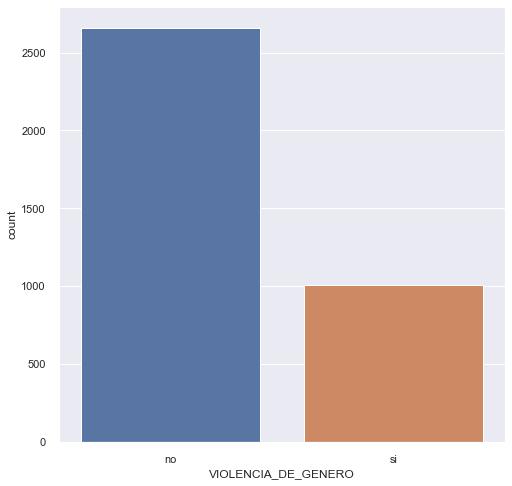

In [70]:
print(freq_tbl(data_hecho["VIOLENCIA_DE_GENERO"]),"\n")
plt.figure(figsize=(8,8))
sns.countplot(x="VIOLENCIA_DE_GENERO",data = data_hecho)
plt.show()

El 72.5% de las causas que tiene el juzgado no son por violencia de genero, por ende, el 27.5% SI lo son

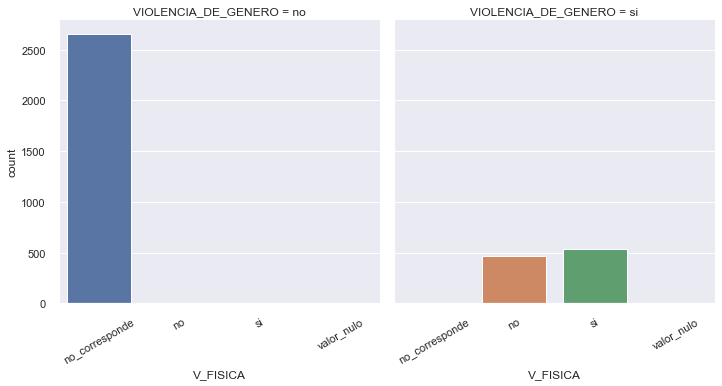

VIOLENCIA_DE_GENERO        no        si
V_FISICA                               
no                   0.000752  0.460159
no_corresponde       0.998496  0.000000
si                   0.000752  0.537849
valor_nulo           0.000000  0.001992 




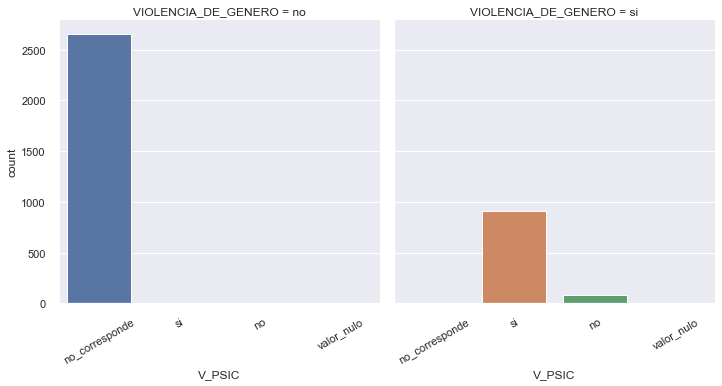

VIOLENCIA_DE_GENERO        no        si
V_PSIC                                 
no                   0.000000  0.085657
no_corresponde       0.998496  0.000000
si                   0.001504  0.910359
valor_nulo           0.000000  0.003984 




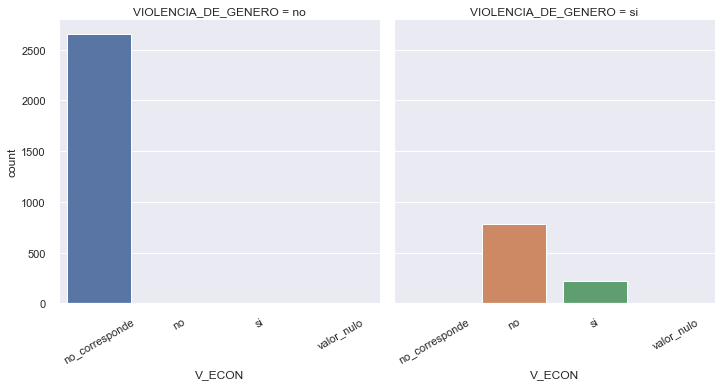

VIOLENCIA_DE_GENERO        no        si
V_ECON                                 
no                   0.000752  0.777888
no_corresponde       0.998496  0.000000
si                   0.000752  0.219124
valor_nulo           0.000000  0.002988 




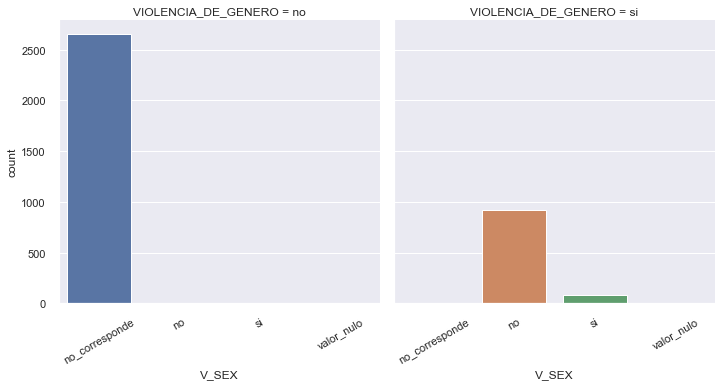

VIOLENCIA_DE_GENERO        no        si
V_SEX                                  
no                   0.001504  0.919323
no_corresponde       0.998496  0.000000
si                   0.000000  0.077689
valor_nulo           0.000000  0.002988 




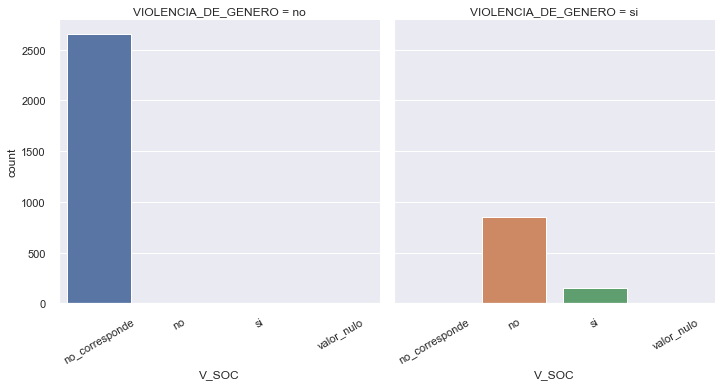

VIOLENCIA_DE_GENERO        no        si
V_SOC                                  
no                   0.001504  0.844622
no_corresponde       0.998496  0.000000
si                   0.000000  0.152390
valor_nulo           0.000000  0.002988 




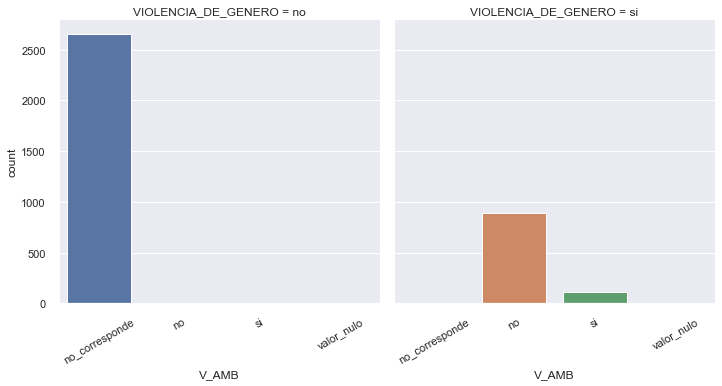

VIOLENCIA_DE_GENERO        no        si
V_AMB                                  
no                   0.001504  0.890438
no_corresponde       0.998496  0.000000
si                   0.000000  0.106574
valor_nulo           0.000000  0.002988 




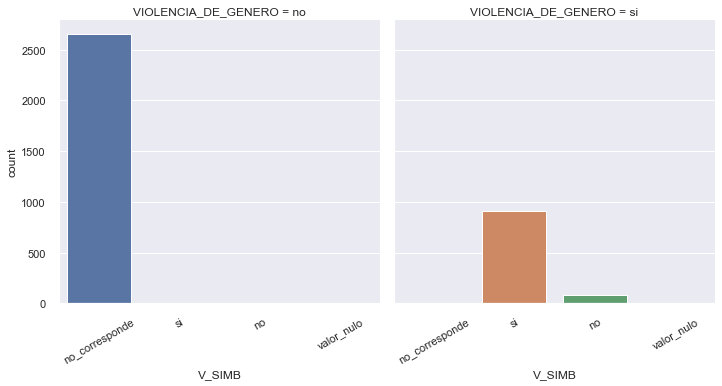

VIOLENCIA_DE_GENERO        no        si
V_SIMB                                 
no                   0.000000  0.085657
no_corresponde       0.998496  0.000000
si                   0.001504  0.910359
valor_nulo           0.000000  0.003984 




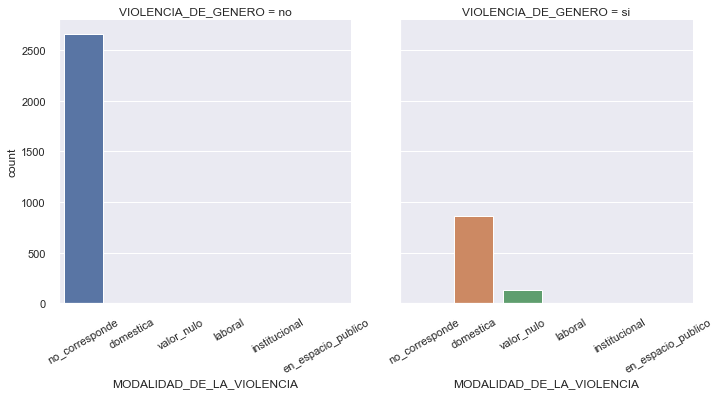

VIOLENCIA_DE_GENERO         no        si
MODALIDAD_DE_LA_VIOLENCIA               
domestica                  0.0  0.861554
en_espacio_publico         0.0  0.000996
institucional              0.0  0.001992
laboral                    0.0  0.000996
no_corresponde             1.0  0.002988
valor_nulo                 0.0  0.131474 




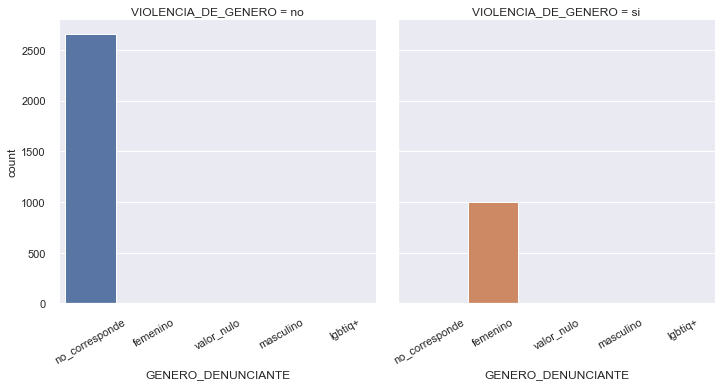

VIOLENCIA_DE_GENERO        no        si
GENERO_DENUNCIANTE                     
femenino             0.000376  0.998008
lgbtiq+              0.000000  0.000996
masculino            0.000000  0.000996
no_corresponde       0.999248  0.000000
valor_nulo           0.000376  0.000000 




In [71]:
vars_to_plot = ['V_FISICA','V_PSIC', 'V_ECON', 'V_SEX', 'V_SOC', 'V_AMB', 'V_SIMB','MODALIDAD_DE_LA_VIOLENCIA', 'GENERO_DENUNCIANTE']

col = "VIOLENCIA_DE_GENERO"

for i in vars_to_plot:
    sns.set(rc={'figure.figsize':(20,20)})
    a = sns.catplot(x=i,col=col,kind = "count", data=data_hecho, height=5)
    #plt.xticks(rotation = 30)
    a.set_xticklabels(rotation=30)
    plt.show()
    print(pd.crosstab(data_hecho[i], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns"),"\n\n")

### **Primeras conclusiones del analisis exploratorio:**

+ Cuando miramos las denuncias por violencia de genero, la violencia que mas sufren las mujeres son las psicologicas y simbolicas, con un 91% de los casos, luego, en el 53% de los casos la victima sufio violencia fisica, en el 22% violencia economica, 15% violencia social, 10% violencia ambiental en el 7% violencia sexual.

+ El 86% de las casos se ejercio una violencia domestica, es decir, dentro del hogar de la victima.

+ Por ultimo en esta seccion de graficos podemos ver como, tristemente, el 99% de las victimas de violencia de genero son personas del sexo femenino

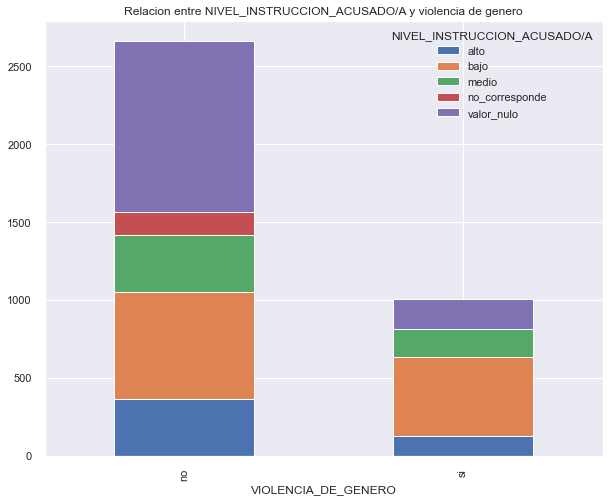

VIOLENCIA_DE_GENERO                no        si
NIVEL_INSTRUCCION_ACUSADO/A                    
alto                         0.137218  0.126494
bajo                         0.257895  0.505976
medio                        0.137970  0.176295
no_corresponde               0.054135  0.000996
valor_nulo                   0.412782  0.190239 




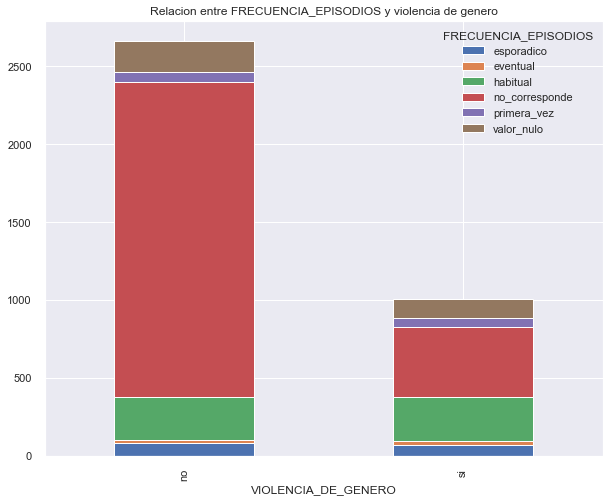

VIOLENCIA_DE_GENERO         no        si
FRECUENCIA_EPISODIOS                    
esporadico            0.029699  0.065737
eventual              0.009023  0.027888
habitual              0.102256  0.279880
no_corresponde        0.761278  0.450199
primera_vez           0.023684  0.056773
valor_nulo            0.074060  0.119522 




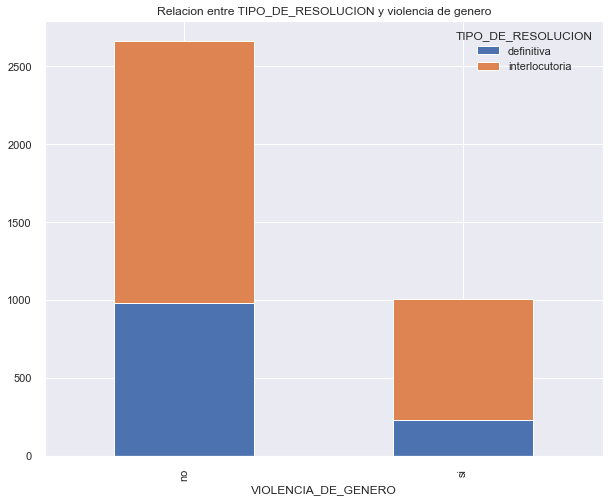

VIOLENCIA_DE_GENERO        no        si
TIPO_DE_RESOLUCION                     
definitiva           0.367669  0.227092
interlocutoria       0.632331  0.772908 




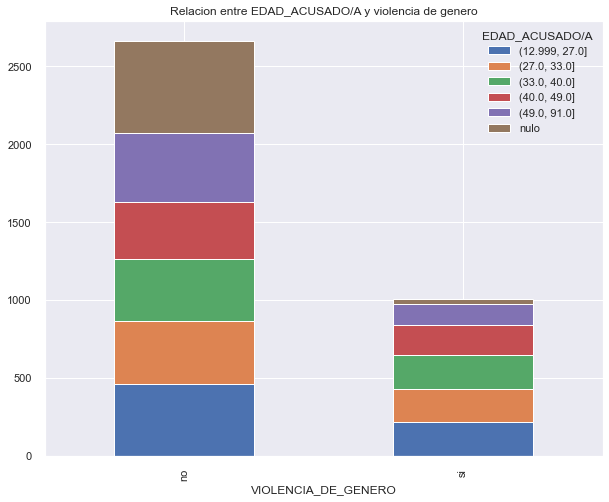

VIOLENCIA_DE_GENERO        no        si
EDAD_ACUSADO/A                         
(12.999, 27.0]       0.171805  0.213147
(27.0, 33.0]         0.153008  0.213147
(33.0, 40.0]         0.150376  0.216135
(40.0, 49.0]         0.137594  0.192231
(49.0, 91.0]         0.166541  0.134462
nulo                 0.220677  0.030876 




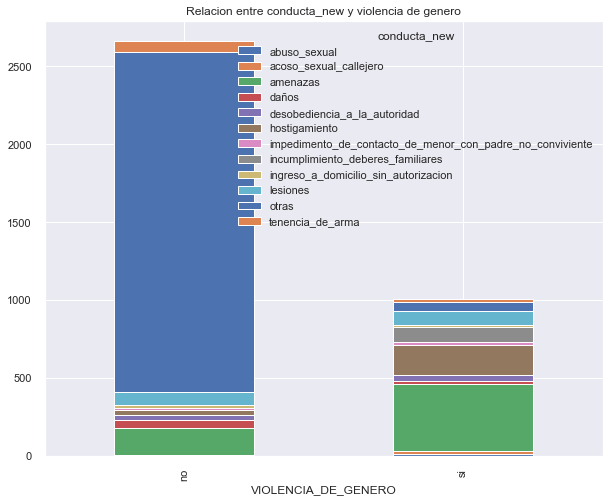

VIOLENCIA_DE_GENERO                                       no        si
conducta_new                                                          
abuso_sexual                                        0.000000  0.009960
acoso_sexual_callejero                              0.000752  0.020916
amenazas                                            0.065414  0.425299
daños                                               0.019925  0.018924
desobediencia_a_la_autoridad                        0.011654  0.039841
hostigamiento                                       0.013158  0.190239
impedimento_de_contacto_de_menor_con_padre_no_c...  0.004135  0.018924
incumplimiento_deberes_familiares                   0.000000  0.096614
ingreso_a_domicilio_sin_autorizacion                0.007519  0.014940
lesiones                                            0.030451  0.091633
otras                                               0.821429  0.053785
tenencia_de_arma                                    0.025564  0.018924 




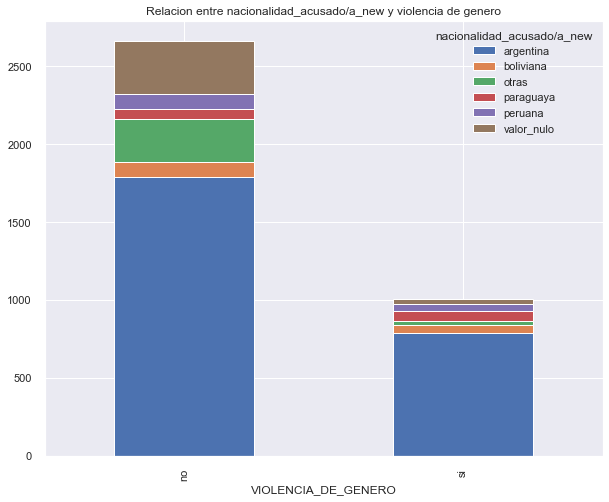

VIOLENCIA_DE_GENERO               no        si
nacionalidad_acusado/a_new                    
argentina                   0.671429  0.780876
boliviana                   0.036466  0.055777
otras                       0.105263  0.024900
paraguaya                   0.024436  0.064741
peruana                     0.034211  0.043825
valor_nulo                  0.128195  0.029880 




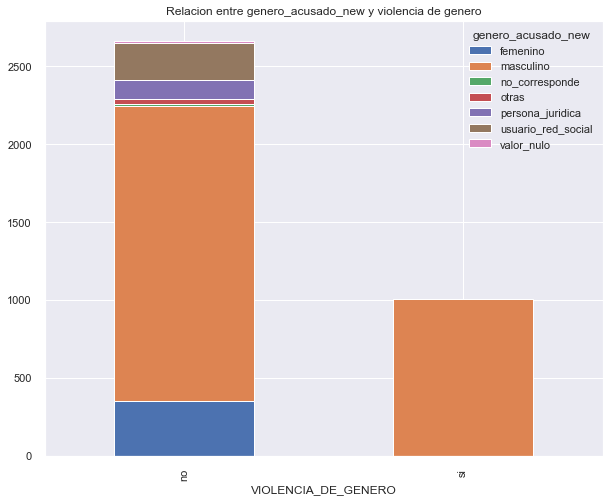

VIOLENCIA_DE_GENERO        no        si
genero_acusado_new                     
femenino             0.131955  0.000000
masculino            0.713158  0.999004
no_corresponde       0.004511  0.000000
otras                0.012406  0.000000
persona_juridica     0.043985  0.000996
usuario_red_social   0.090977  0.000000
valor_nulo           0.003008  0.000000 




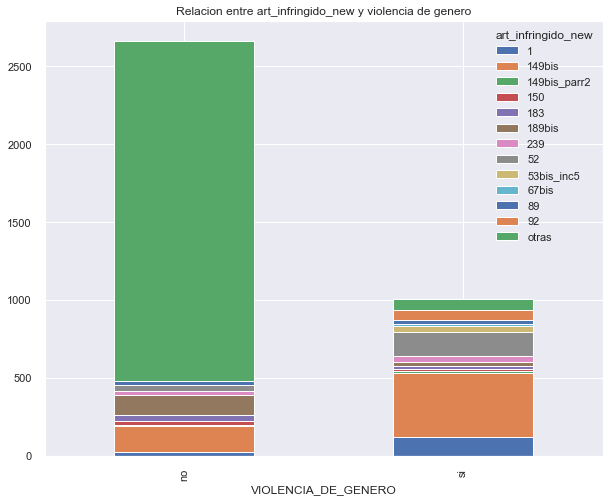

VIOLENCIA_DE_GENERO        no        si
art_infringido_new                     
1                    0.009398  0.116534
149bis               0.062030  0.410359
149bis_parr2         0.003383  0.013944
150                  0.007519  0.014940
183                  0.016165  0.018924
189bis               0.046617  0.024900
239                  0.011654  0.039841
52                   0.012782  0.153386
53bis_inc5           0.000000  0.035857
67bis                0.000000  0.015936
89                   0.010902  0.023904
92                   0.000752  0.065737
otras                0.818797  0.065737 




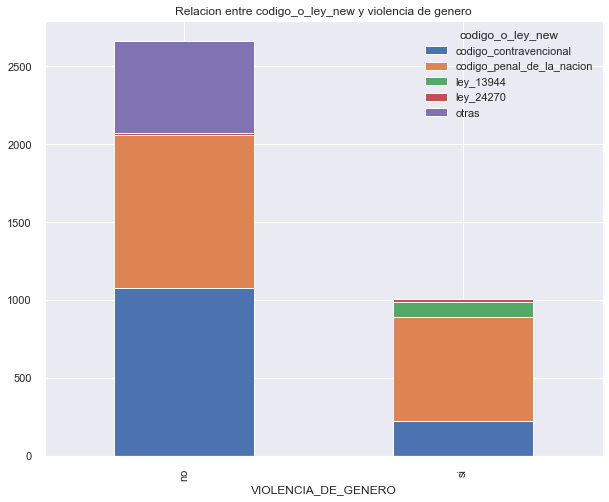

VIOLENCIA_DE_GENERO              no        si
codigo_o_ley_new                             
codigo_contravencional     0.403383  0.220120
codigo_penal_de_la_nacion  0.370301  0.663347
ley_13944                  0.000000  0.097610
ley_24270                  0.004135  0.018924
otras                      0.222180  0.000000 




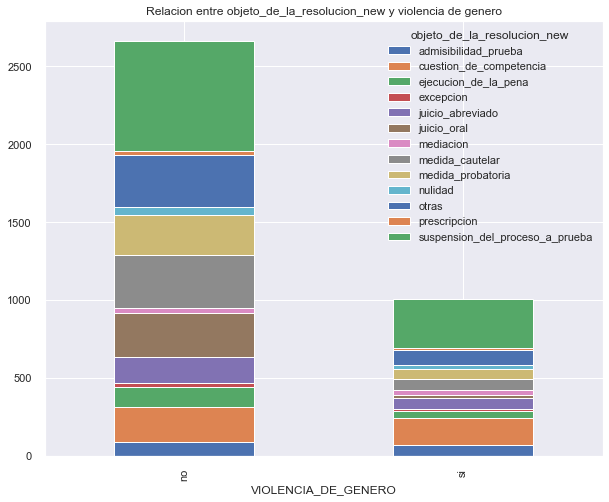

VIOLENCIA_DE_GENERO                    no        si
objeto_de_la_resolucion_new                        
admisibilidad_prueba             0.032331  0.068725
cuestion_de_competencia          0.085338  0.173307
ejecucion_de_la_pena             0.047368  0.040837
excepcion                        0.010526  0.014940
juicio_abreviado                 0.063158  0.072709
juicio_oral                      0.104887  0.014940
mediacion                        0.013158  0.030876
medida_cautelar                  0.127820  0.071713
medida_probatoria                0.096241  0.062749
nulidad                          0.018421  0.025896
otras                            0.127068  0.095618
prescripcion                     0.010150  0.016932
suspension_del_proceso_a_prueba  0.263534  0.310757 




In [72]:
vars_to_plot = ['NIVEL_INSTRUCCION_ACUSADO/A', 'FRECUENCIA_EPISODIOS','TIPO_DE_RESOLUCION','EDAD_ACUSADO/A','conducta_new',
       'nacionalidad_acusado/a_new', 'genero_acusado_new','art_infringido_new', 'codigo_o_ley_new', 'objeto_de_la_resolucion_new']

col = "VIOLENCIA_DE_GENERO"

for i in vars_to_plot:
    
    
    title = "Relacion entre " + i + " y violencia de genero"
    data_hecho.groupby([col,i]).size().unstack().plot(kind='bar',stacked=True,legend=True,figsize = (10,8) , title = title)
    plt.show()
    print(pd.crosstab(data_hecho[i], data_hecho["VIOLENCIA_DE_GENERO"],normalize = "columns"),"\n\n")
    #print(freq_tbl(data_hecho[i]),"\n")

### **Otras conclusiones del analisis exploratorio:**

+ Se podria decir que cuanto menor nivel de estudios tenga el acusado, tiene mayor probabilidad de cometer algun delito de violencia de genero. Esto lo podemos observar porque la proporcion de las personas con niveles de estudios bajos/medios es mas alta en los casos de violencia de genero que cuando miramos el 100% de las causas.

+ Los casos de violencia de genero suelen repetirse con mayor frecuencia que otros tipos, por el hecho de que tienen mucho mas peso las denuncias por violencia habitual y eventual donde hay violencia de genero que cuando no la hay.

+ Se puede observar que la resolucion del juzgado en casos de violencia de genero, suelen tomarse resoluciones interlocutoras en vez de definitiva (a diferencia de los casos en los que no son denuncias de violencia de genero)

+ La mayor cantidad de personas acusadas se encuentran dentro del rango de edad de los 27 a los 33 años.

+ Las conductas mas comunes dentro de las denuncias de violencia de genero son por amenazas, hostigamientos y lesiones.

+ Casi el 70% de las personas, tanto las denunciadas como los denunciantes son de nacionalidad argentina.

+ Los articulos que generalmente se infringen en casos de violencia de genero son el 149bis y el 52. Tambien, son casos que infringen el codigo penal.

+ Las resoluciones que se suelen tomar en el juzgado para casos de violencia de genero son:
  * suspension del proceso a prueba,
  * cuestion de competencia

# Parte 3 - Preparacion de datos

Se arma un dataset para crear un modelo de clusters con unicamente las denuncias por violencia de genero


In [73]:
data_vg_clt = data_hecho[data_hecho["VIOLENCIA_DE_GENERO"]=="si"]
data_vg_clt.drop(columns =  ['df_index', 'FIRMA', 'MATERIA','FRASES_AGRESION','GENERO_DENUNCIANTE',
       'NIVEL_INSTRUCCION_DENUNCIANTE','MEDIDAS_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO', 'ZONA_DEL_HECHO',
       'LUGAR_DEL_HECHO\n', 'TIPO_DE_RESOLUCION', 'DECISION', 'ORAL_ESCRITA', 'conducta_new',
       'conducta_descripcion_new', 'nacionalidad_acusado/a_new',
       'nacionalidad_denunciante_new', 'genero_acusado_new',
       'art_infringido_new', 'codigo_o_ley_new', 'objeto_de_la_resolucion_new',
       'detalle_new','HIJOS/AS_EN_COMUN','VIOLENCIA_DE_GENERO','RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE'],inplace = True)

data_vg_clt['V_FISICA'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_PSIC'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_ECON'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_SEX'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_SOC'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_AMB'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt['V_SIMB'].replace({"valor_nulo":"si"}, inplace=True)
data_vg_clt.replace({"si":1,"no":0}, inplace=True)
data_vg_clt2 = pd.get_dummies(data_vg_clt,drop_first=True)


In [93]:
scaler = StandardScaler()
data_vg_clt2_norm = scaler.fit_transform(data_vg_clt2)

# Parte 4 - Modelos de clustering

####  3 Clusters para las denuncias de violencia de genero

In [94]:
from sklearn.cluster import KMeans

cl_vg_model = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=100, 
    random_state=0
)

cl_vg_model.fit(data_vg_clt2)
pred_vg_cl = cl_vg_model.predict(data_vg_clt2_norm)

In [95]:
cluster_v='cluster'
data_vg_clt2[cluster_v]=cl_vg_model.predict(data_vg_clt2_norm)

In [97]:
x_data_vg=data_vg_clt.copy()
x_data_vg[cluster_v]=data_vg_clt2[cluster_v]

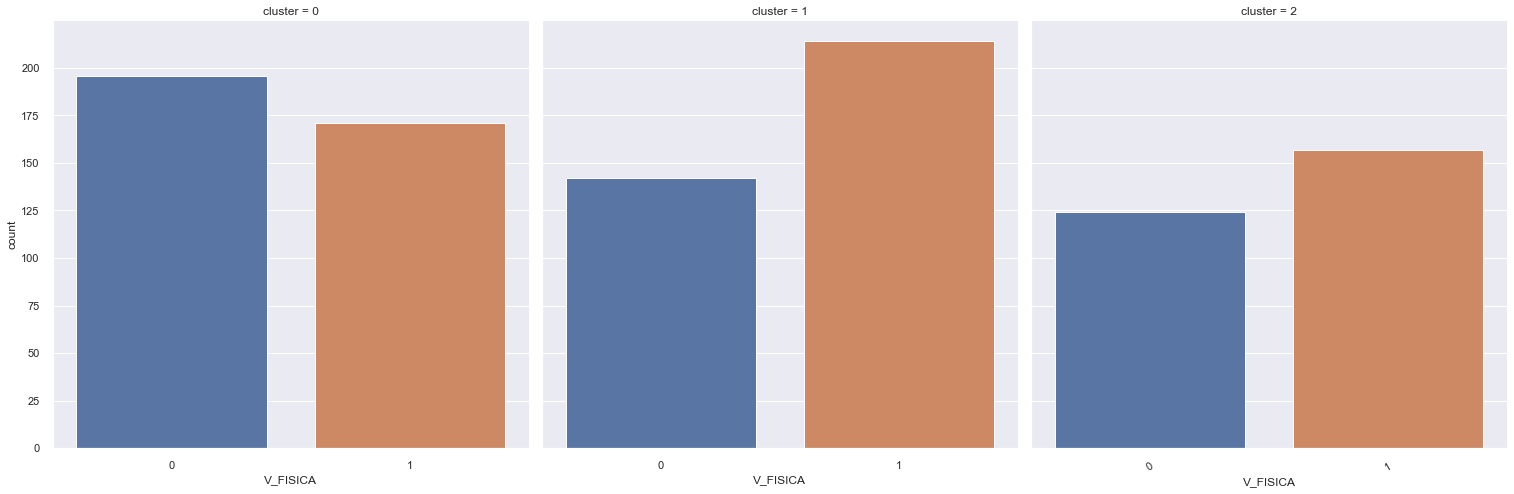

cluster         0         1         2
V_FISICA                             
0         0.53406  0.398876  0.441281
1         0.46594  0.601124  0.558719


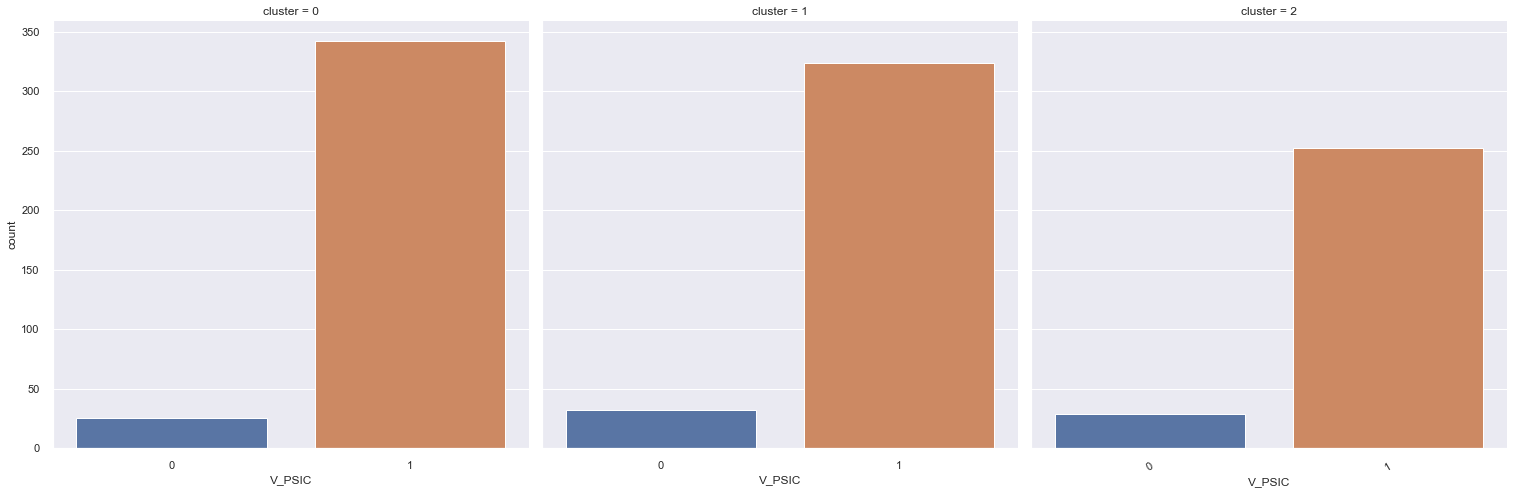

cluster        0         1         2
V_PSIC                              
0        0.06812  0.089888  0.103203
1        0.93188  0.910112  0.896797


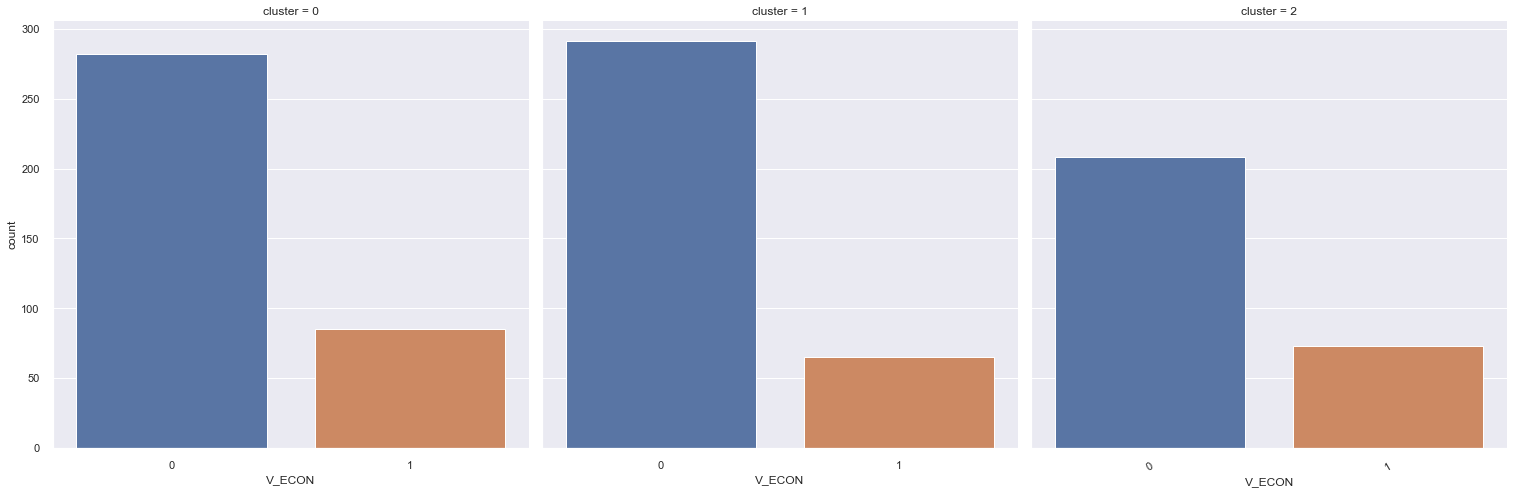

cluster         0         1         2
V_ECON                               
0        0.768392  0.817416  0.740214
1        0.231608  0.182584  0.259786


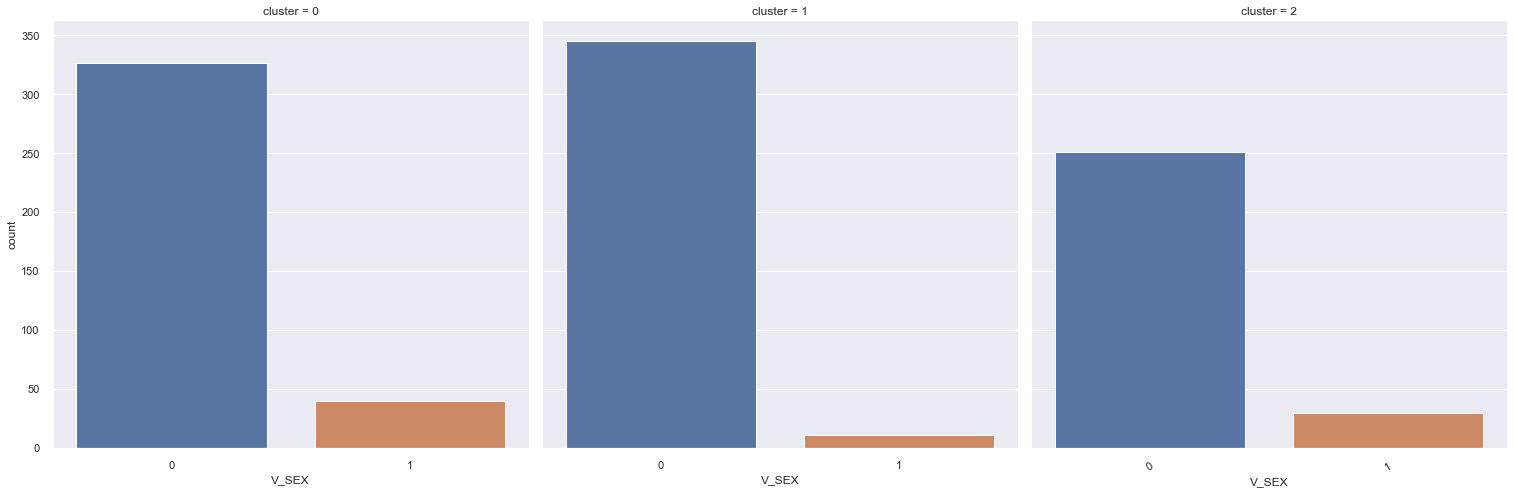

cluster         0         1         2
V_SEX                                
0        0.891008  0.969101  0.893238
1        0.108992  0.030899  0.106762


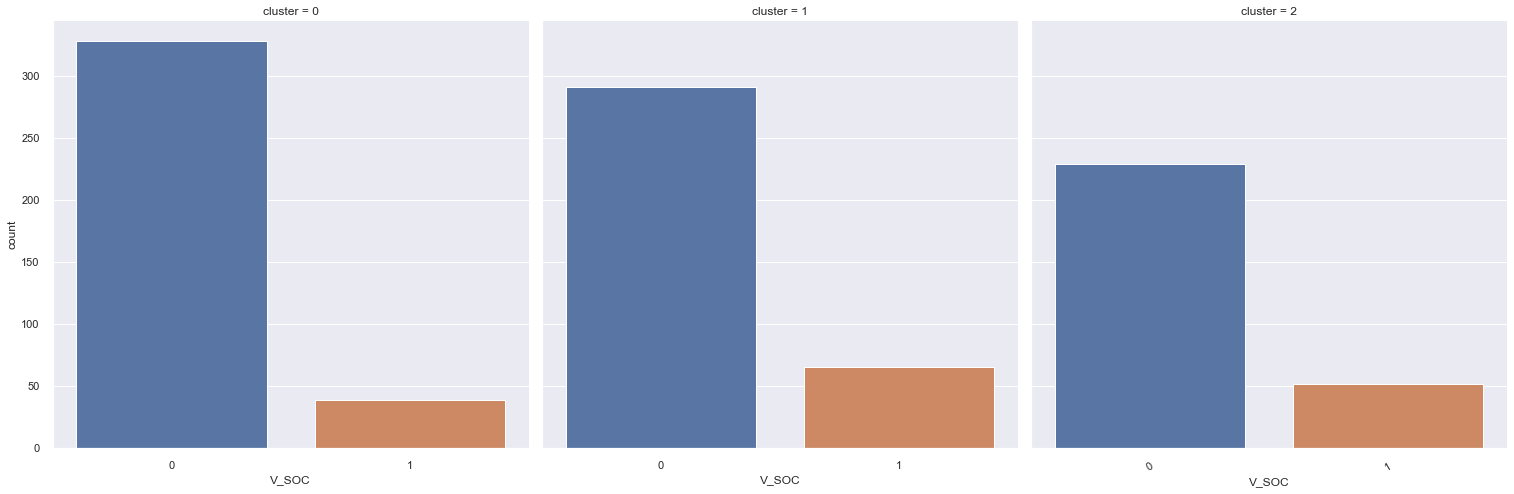

cluster         0         1         2
V_SOC                                
0        0.893733  0.817416  0.814947
1        0.106267  0.182584  0.185053


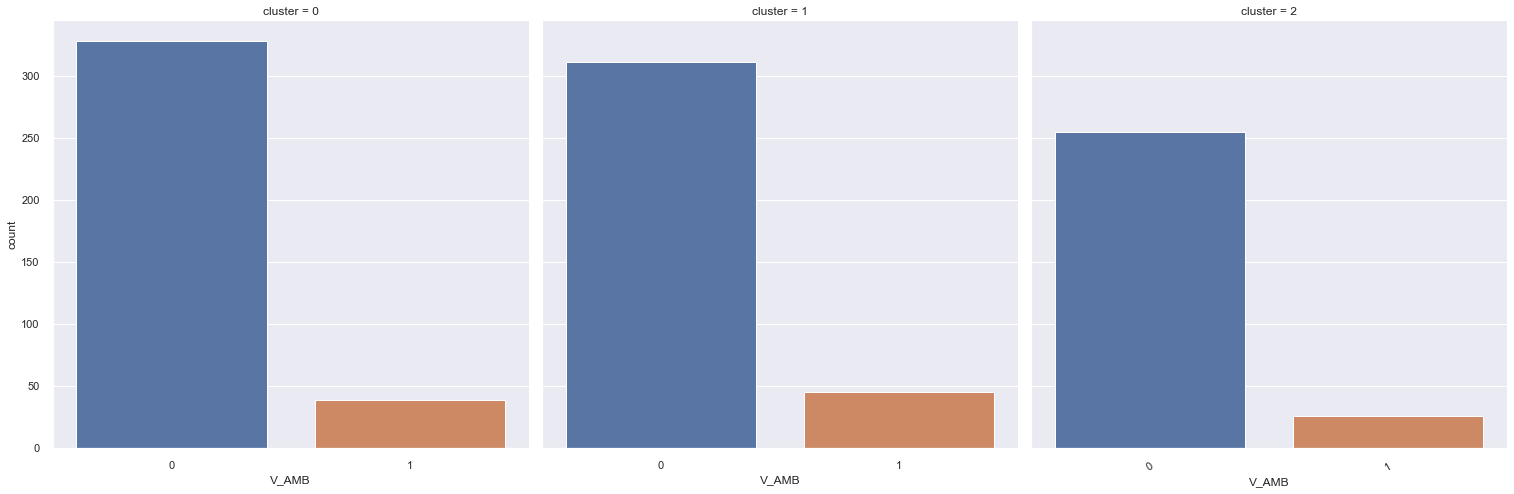

cluster         0         1         2
V_AMB                                
0        0.893733  0.873596  0.907473
1        0.106267  0.126404  0.092527


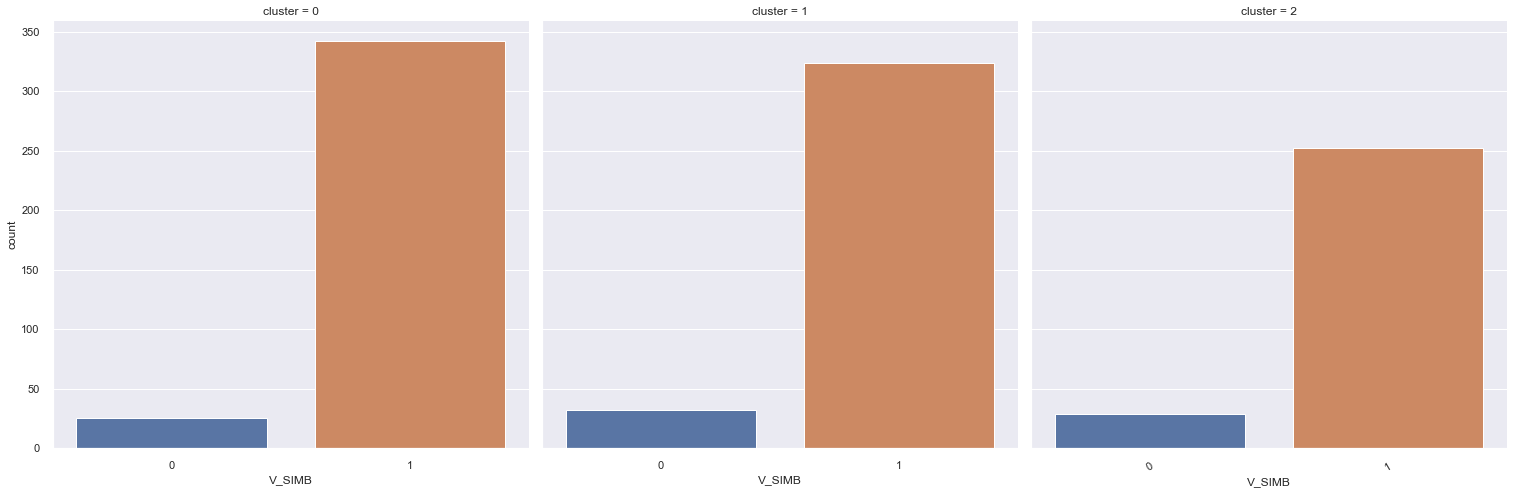

cluster        0         1         2
V_SIMB                              
0        0.06812  0.089888  0.103203
1        0.93188  0.910112  0.896797


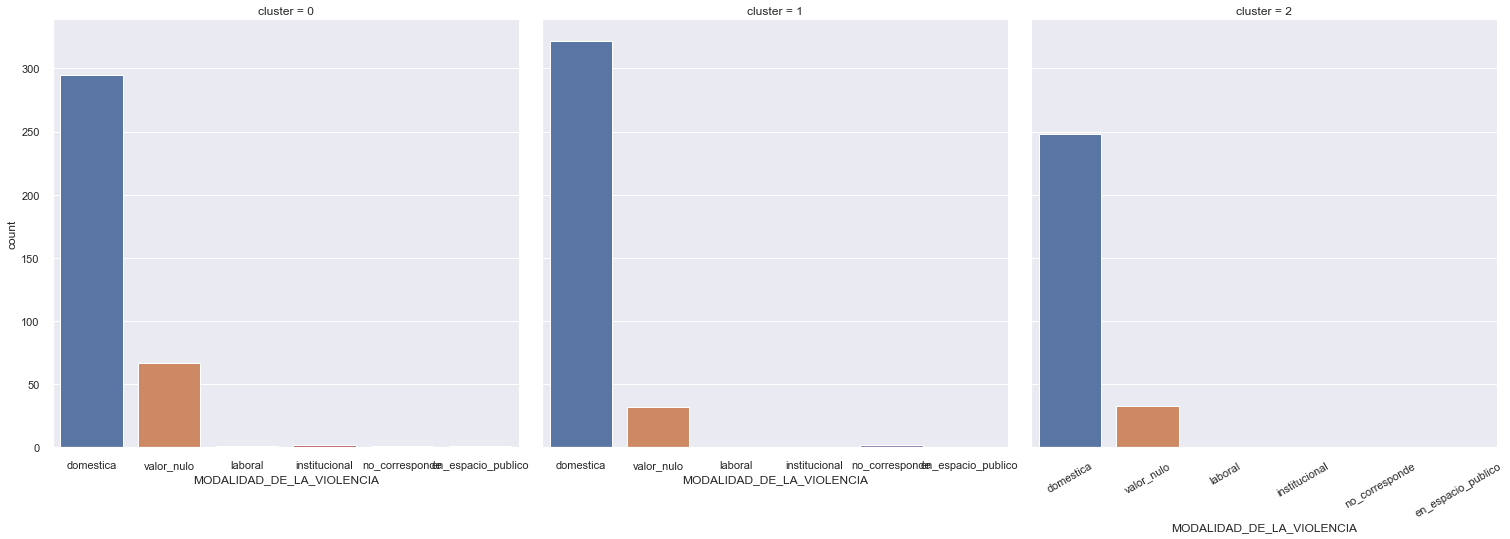

cluster                           0         1         2
MODALIDAD_DE_LA_VIOLENCIA                              
domestica                  0.803815  0.904494  0.882562
en_espacio_publico         0.002725  0.000000  0.000000
institucional              0.005450  0.000000  0.000000
laboral                    0.002725  0.000000  0.000000
no_corresponde             0.002725  0.005618  0.000000
valor_nulo                 0.182561  0.089888  0.117438


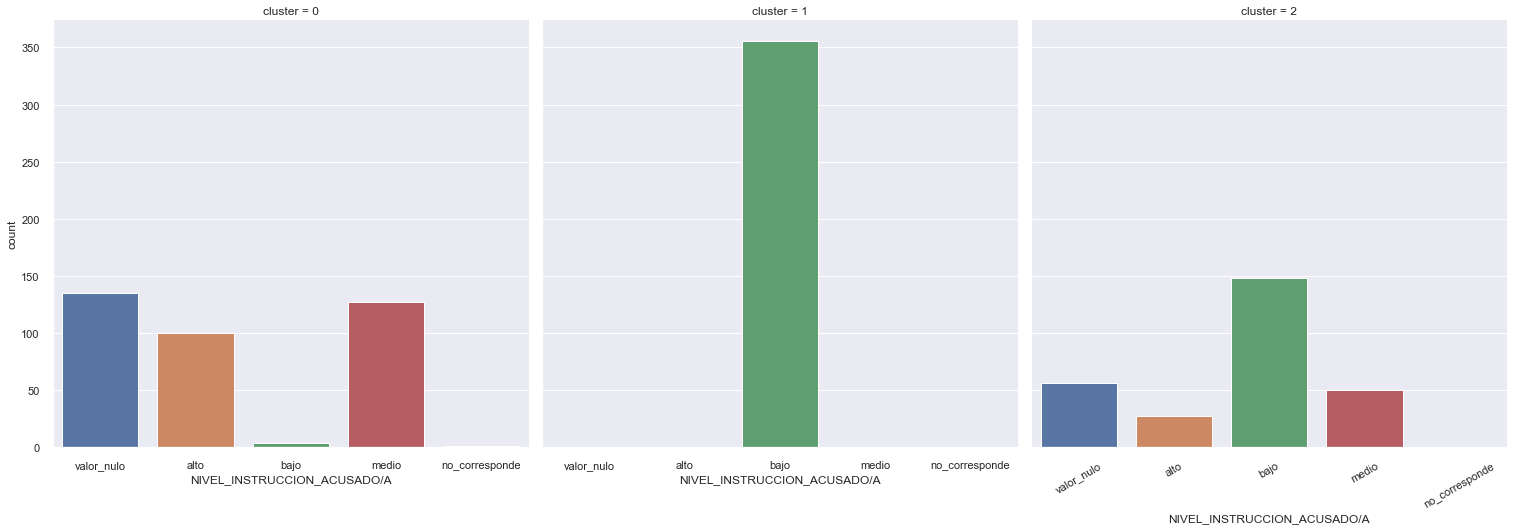

cluster                             0    1         2
NIVEL_INSTRUCCION_ACUSADO/A                         
alto                         0.272480  0.0  0.096085
bajo                         0.010899  1.0  0.526690
medio                        0.346049  0.0  0.177936
no_corresponde               0.002725  0.0  0.000000
valor_nulo                   0.367847  0.0  0.199288


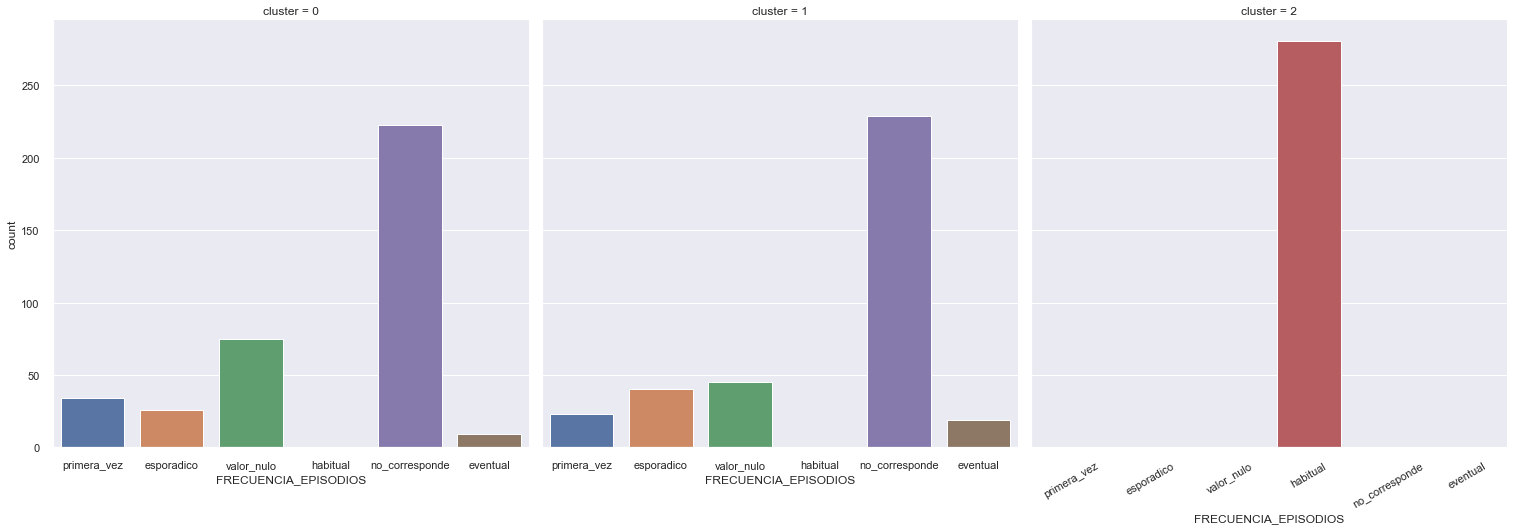

cluster                      0         1    2
FRECUENCIA_EPISODIOS                         
esporadico            0.070845  0.112360  0.0
eventual              0.024523  0.053371  0.0
habitual              0.000000  0.000000  1.0
no_corresponde        0.607629  0.643258  0.0
primera_vez           0.092643  0.064607  0.0
valor_nulo            0.204360  0.126404  0.0


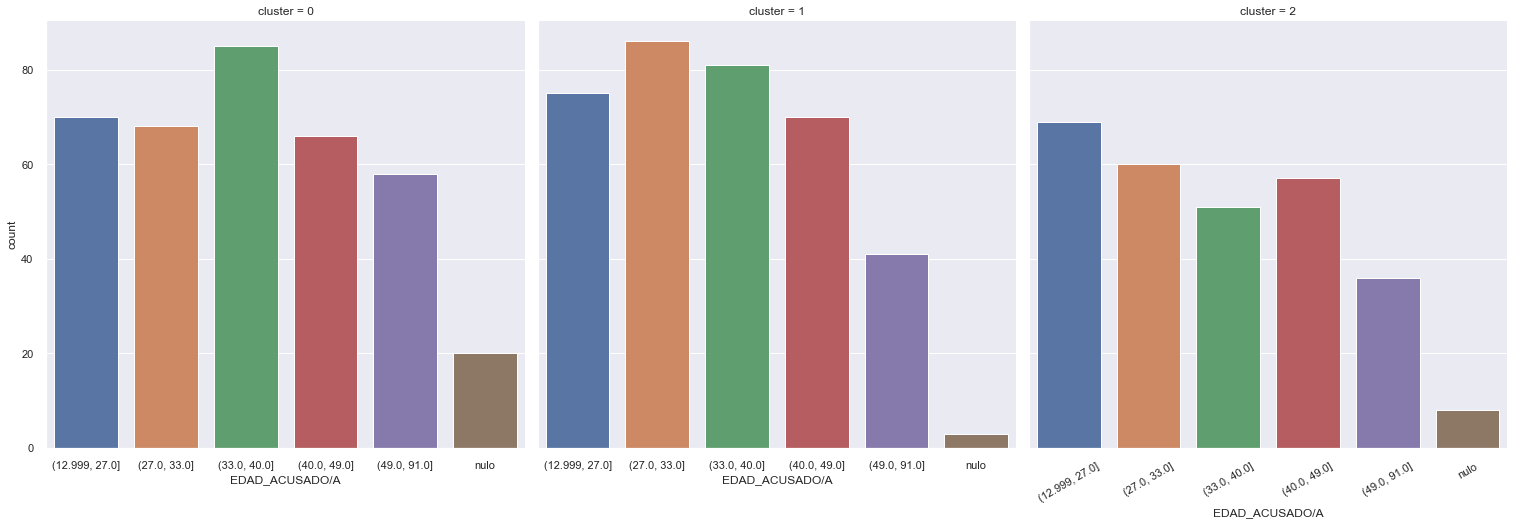

cluster                0         1         2
EDAD_ACUSADO/A                              
(12.999, 27.0]  0.190736  0.210674  0.245552
(27.0, 33.0]    0.185286  0.241573  0.213523
(33.0, 40.0]    0.231608  0.227528  0.181495
(40.0, 49.0]    0.179837  0.196629  0.202847
(49.0, 91.0]    0.158038  0.115169  0.128114
nulo            0.054496  0.008427  0.028470


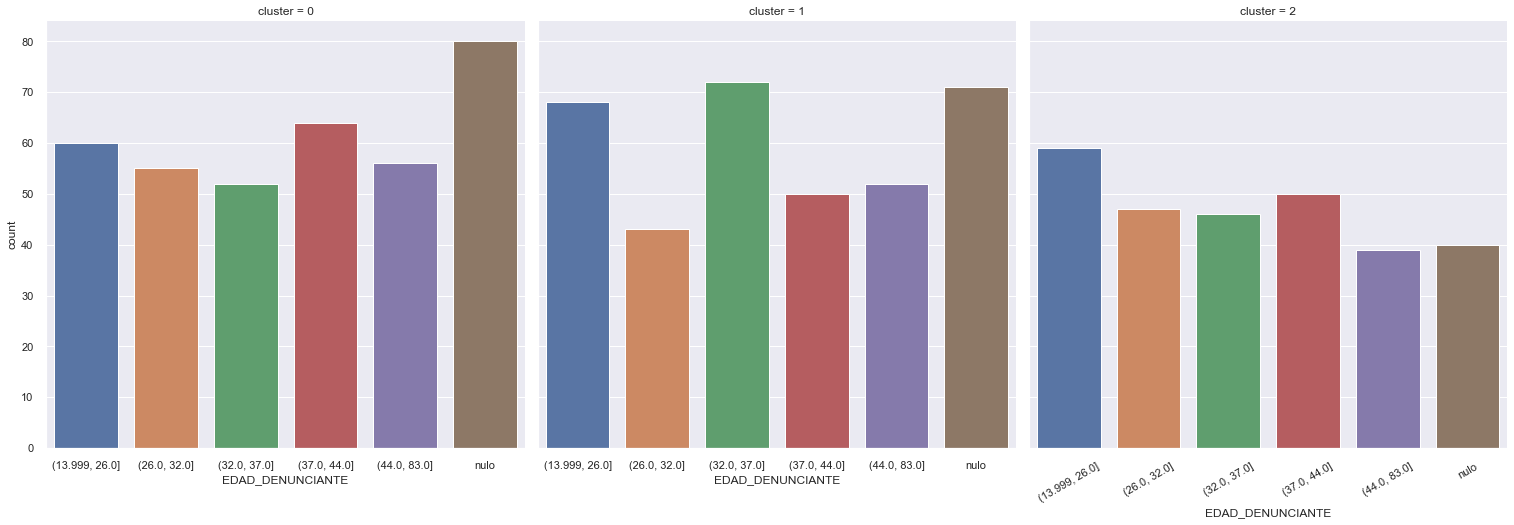

cluster                  0         1         2
EDAD_DENUNCIANTE                              
(13.999, 26.0]    0.163488  0.191011  0.209964
(26.0, 32.0]      0.149864  0.120787  0.167260
(32.0, 37.0]      0.141689  0.202247  0.163701
(37.0, 44.0]      0.174387  0.140449  0.177936
(44.0, 83.0]      0.152589  0.146067  0.138790
nulo              0.217984  0.199438  0.142349


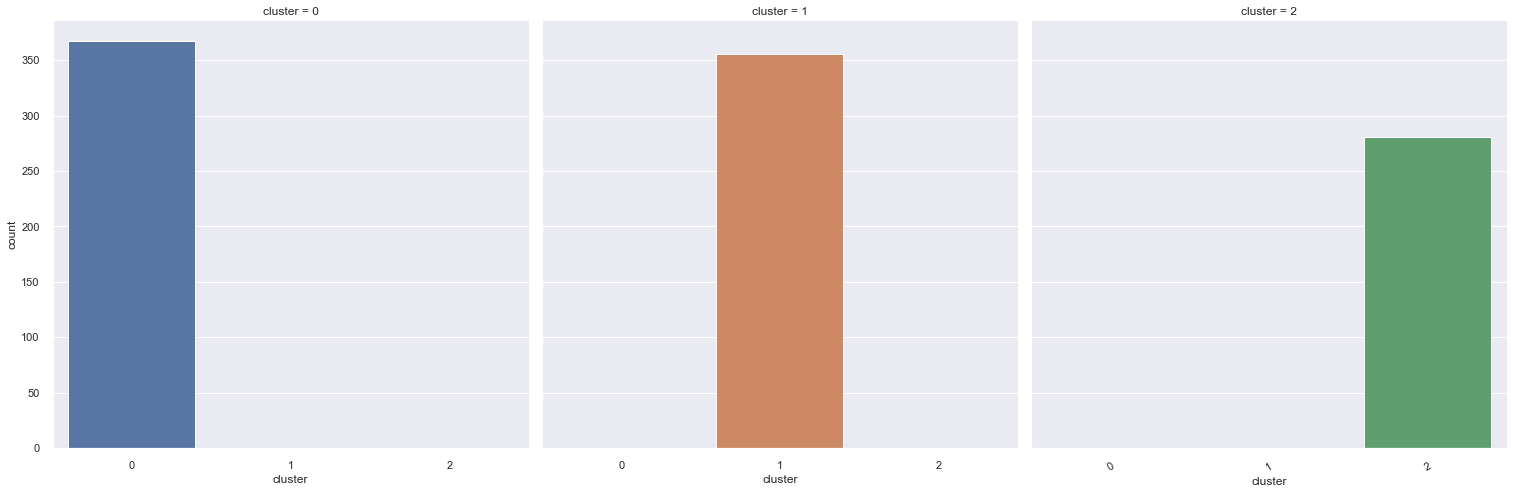

cluster    0    1    2
cluster               
0        1.0  0.0  0.0
1        0.0  1.0  0.0
2        0.0  0.0  1.0


In [107]:
vars_to_plot = x_data_vg.columns
col = "cluster"

for i in vars_to_plot:
    sns.set(rc={'figure.figsize':(20,20)})
    sns.catplot(x=i,col=col,kind = "count", data=x_data_vg, height=7)
    plt.xticks(rotation = 30)
    plt.show()
    print(pd.crosstab(x_data_vg[i], x_data_vg["cluster"],normalize = "columns"))
    
#analizar y armar graficos para ver la proporcion de cada valor

#### Los resultados de armar un cluster de 3 grupos arroja los siguientes resultados:

**Cluster 0:** Representa un 36% de la denuncias. En este grupo se encuentran en general, denunciados con un nivel de estudios medio o alto. Predomina la violencia psicologica y simbolica y no hay tanta violencia fisica como en los otros grupos. En general la violencia es domestica, aunque aparecen algunos pocos casos de violencia institucional y laboral. Los rangos de edad predominantes son los mas elevados en comparacion con otros clusters (entre 33 y 47 años tanto para el denunciado como el denunciante)

**Cluster 1:** Representa un 35% de las denuncias. El 100% de los denunciados son personas con un nivel de estudio bajo. En este grupo es donde hay mas proporcion de denuncias con violencia fisica. Tambien, hay un alto porcentaje de violencia psicologica y simbolica, al igual que en los otros dos clusters. Casi siempre la violencia es domestica. La frecuencia mas alta en la que suceden los hechos en este cluster es eventual, es decir, quincenal o mensualmente, aunque en general, la frecuencia es menor a este periodo. Los acusados en general tienen entre 27 y 32 años y los denunciantes entre 32 y 37.

**Cluster 2:** Representa un 29% de las denuncias. Este cluster se diferencia por tener el 100% de los casos con violencia habitual (violencia semanal). Dentro de estos, el 50% son personas con estudios bajos. En mas de la mitad de los casos la victima sufrio violencia fisica y al igual que en los otros clusters, casi siempre se lleva a cabo violencia psicologica y simbolica. Casi siempre la violencia es domestica. El rango de edad, tanto de los denunciados como los denunciantes es el mas bajo, donde como maximos tiene 27 años.

# 5- Conclusiones

+ #### El **~28%** de las causas en las que interviene el juzgado N° 10 de CABA son por **violencia de genero**

+ #### **El 99% de las victimas de violencia de genero son mujeres**

+ #### De las causas de violencia de genero, las conductas de agresion se distribuyen de la siguiente manera:
    + Violencia psicologica: Esta presente en el 91% de los casos
    + Violencia simbolica: Esta presente en el 91% de los casos
    + Violencia fisica: Esta presente en el 53% de los casos
    + Violencia economica: Esta presente en el 22% de los casos
    + Violencia social: Esta presente en el 15% de los casos
    + Violencia ambiental: Esta presente en el 10% de los casos
    + Violencia sexual: Esta presente en el 7% de los casos


+ #### En el 86% de las causas, la violencia de genero se lleva a cabo en el ambito domestico

+ #### Las casos de violencia de genero suelen repetirse con mayor frecuencia que delitos de otra indole. El ~30% de los casos de violencia de genero se repiten de manera habitual/eventual (1 o mas veces por mes)

+ #### Las conductas más denunciadas en casos de violencia de genero son amenazas, hostigamientos y lesiones. Estas representan ~ el 71% de las denuncias.

+ #### Los denunciados por delitos de violencia de genero se encuentran en un rango de edad entre los 27 y 33 años

+ #### En el 70% de las denuncias de violencia de genero ambas partes involucradas son de nacionalidad Argentina

+ #### En general, los denunciantes tienen menor edad que los denunciados

+ #### De las causas que llegaron al juzgado (vale la aclaracion para evitar sacar conclusiones con informacion sesgada), hay mas probabilidad de que personas con menor nivel de estudios comentan delitos de violencia de genero que de otra indole.


+ #### Tambien se podria decir que cuando el denunciante tiene niveles de estudios mas bajos, hay mas violencia fisica que en denunciados de nivel de estudio mas alto, donde predominan violencias psicologicas y simbolicas.


+ #### En un poco mas del 50% de las denuncias donde se recibe violencia por lo menos una vez por semana, la victima sufre de violencia fisica en el ambito domestico

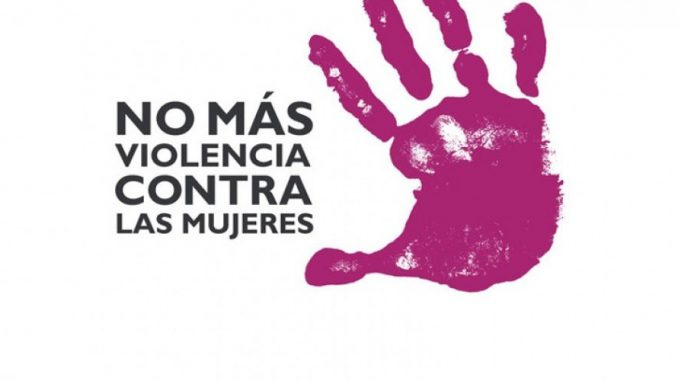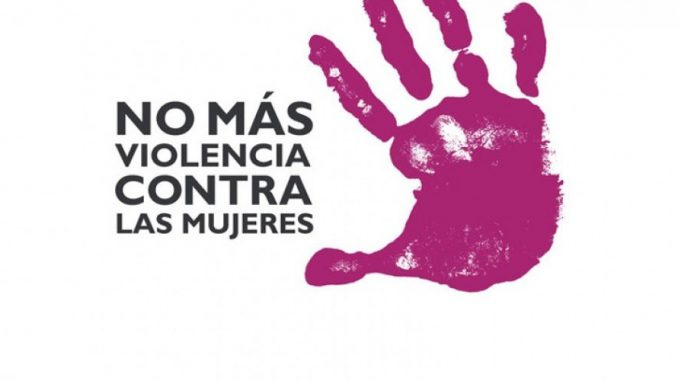